In [1]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

In [2]:
%matplotlib inline
import IPython
import _pickle as pickle
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [3]:

# load the data csv
csv_path = 'time_series_covid19_confirmed_US.csv'
csv = pd.read_csv(csv_path)
#check the data
csv

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,11/4/20,11/5/20,11/6/20,11/7/20,11/8/20,11/9/20,11/10/20,11/11/20,11/12/20,11/13/20
0,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,...,2212,2230,2242,2267,2283,2304,2328,2351,2385,2417
1,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,...,7061,7097,7134,7188,7226,7263,7348,7409,7454,7523
2,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,...,1079,1080,1090,1092,1095,1098,1107,1112,1113,1117
3,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,...,897,907,917,924,926,932,948,961,966,973
4,84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,...,2188,2222,2253,2286,2297,2335,2378,2400,2429,2488
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3335,84056039,US,USA,840,56039.0,Teton,Wyoming,US,43.935225,-110.589080,...,873,897,922,932,977,1007,1022,1025,1066,1108
3336,84056041,US,USA,840,56041.0,Uinta,Wyoming,US,41.287818,-110.547578,...,518,529,542,544,551,568,614,627,664,686
3337,84090056,US,USA,840,90056.0,Unassigned,Wyoming,US,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
3338,84056043,US,USA,840,56043.0,Washakie,Wyoming,US,43.904516,-107.680187,...,175,179,188,185,187,190,197,199,203,206


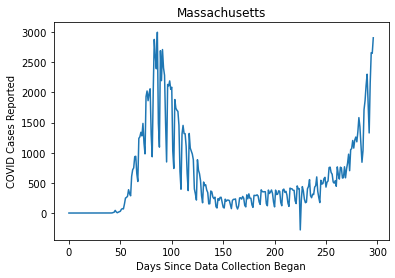

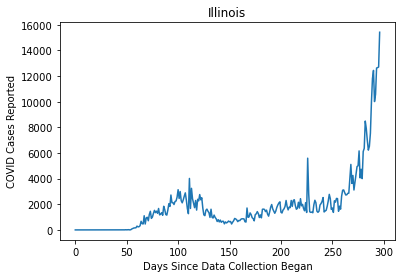

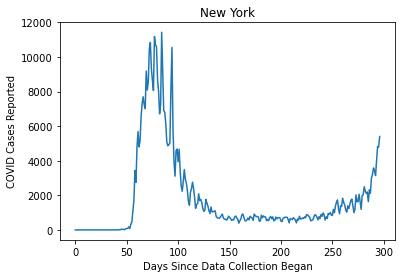

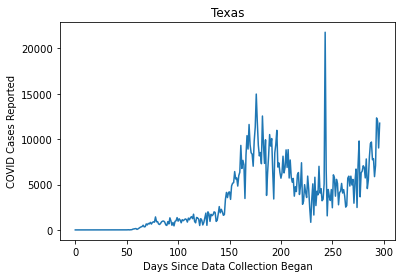

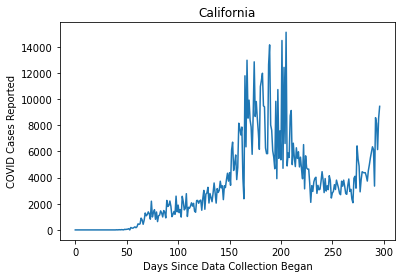

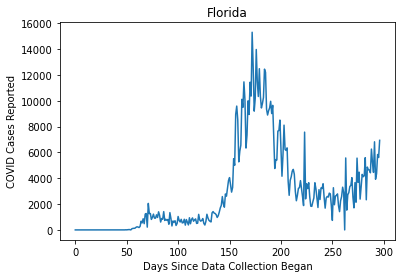

In [4]:
# Plot the basic caseload curves for our states of interest:

# extract the list of columns
columns = list(csv.columns)
# daily data are after column 11
days = columns[11:]
SOI = ['Massachusetts', 'Illinois', 'New York', 'Texas', 'California', 'Florida']

#Function to get the daily new cases for a given state
def get_state_arr(state, days):
    # restrict to your state's data
    csv_state = csv[csv['Province_State'] == state]
    # find the new daily cases
    daily_new_cases = []
    prev_sum = 0
    for day in days:
        counties_sum = 0
        for county in csv_state[day]:
            counties_sum += county
        
        daily_new_cases.append(counties_sum - prev_sum)
        prev_sum = counties_sum
        state_arr = np.asarray(daily_new_cases)
    return state_arr

for state in SOI:
    state_curve = get_state_arr(state, days)
    plt.plot(state_curve)
    plt.title(state)
    plt.xlabel("Days Since Data Collection Began")
    plt.ylabel("COVID Cases Reported")
    plt.show()

In [5]:
# Write a function to take and plot the DC-component removed FFT of the data of a given state

def get_state_fft(state, days):
    state_curve = get_state_arr(state, days)
    state_curve = state_curve[0:294]
    x_ax = np.linspace(0,1, len(state_curve))
    statemean = np.mean(state_curve)
    statemr = state_curve - statemean
    statefft = np.fft.fft(statemr)
    plt.plot(x_ax, abs(statefft))
    plt.xlabel("Frequency")
    plt.ylabel("Amplitude")
    plt.title("DFT of " + str(state)+ " Covid Data: DC Removed")
    #return statefft
    

[]

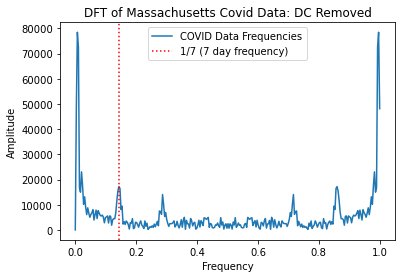

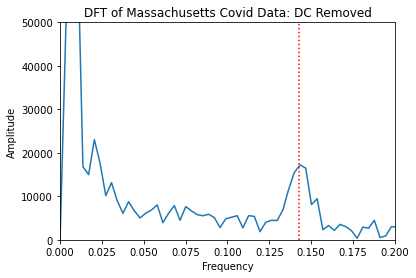

In [18]:
#Taking the fourier transform of the mean-removed data for Massachusetts
plt.figure()
get_state_fft('Massachusetts', days)
plt.axvline(x=(1/7), color='red', linestyle = 'dotted')
plt.legend(['COVID Data Frequencies', '1/7 (7 day frequency)'])

plt.figure()
get_state_fft('Massachusetts', days)
plt.axvline(x=(1/7), color='red', linestyle = 'dotted')
plt.xlim(0,0.2)
plt.ylim(0,50000)
plt.plot()


[]

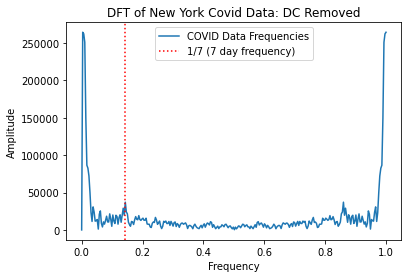

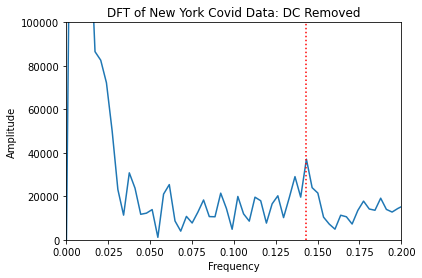

In [19]:
#Taking the fourier transform of the mean-removed data for New York
plt.figure()
get_state_fft('New York', days)
plt.axvline(x=(1/7), color='red', linestyle = 'dotted')
plt.legend(['COVID Data Frequencies', '1/7 (7 day frequency)'])

plt.figure()
get_state_fft('New York', days)
plt.axvline(x=(1/7), color='red', linestyle = 'dotted')
plt.xlim(0,0.2)
plt.ylim(0,100000)
plt.plot()

[]

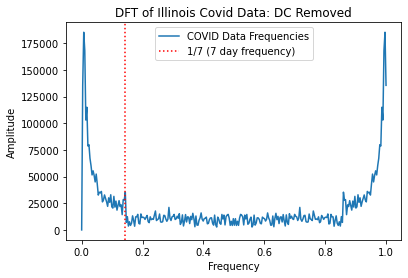

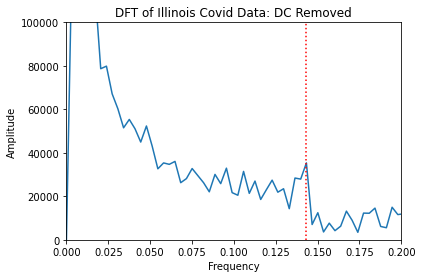

In [20]:
#Taking the fourier transform of the mean-removed data for Illinois
plt.figure()
get_state_fft('Illinois', days)
plt.axvline(x=(1/7), color='red', linestyle = 'dotted')
plt.legend(['COVID Data Frequencies', '1/7 (7 day frequency)'])

plt.figure()
get_state_fft('Illinois', days)
plt.axvline(x=(1/7), color='red', linestyle = 'dotted')
plt.xlim(0,0.2)
plt.ylim(0,100000)
plt.plot()

[]

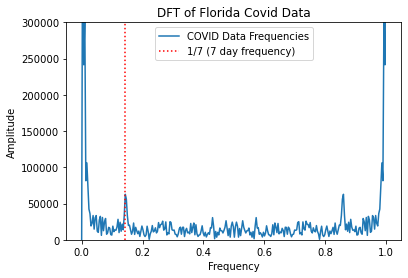

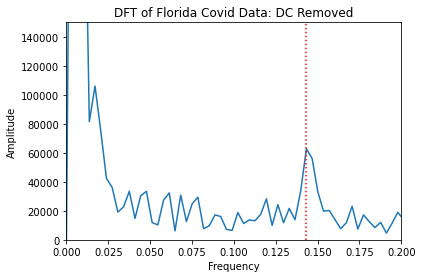

In [21]:
#Taking the fourier transform of the mean-removed data for Florida
plt.figure(2)
get_state_fft('Florida', days)
plt.axvline(x=(1/7), color='red', linestyle = 'dotted')
plt.legend(['COVID Data Frequencies', '1/7 (7 day frequency)'])
plt.title("DFT of Florida Covid Data")
plt.ylim(0,300000)
plt.plot()


plt.figure()
get_state_fft('Florida', days)
plt.axvline(x=(1/7), color='red', linestyle = 'dotted')
plt.xlim(0,0.2)
plt.ylim(0,150000)
plt.plot()

Text(0.5, 1.0, 'DFT of Florida Covid Data: First 30 Weeks')

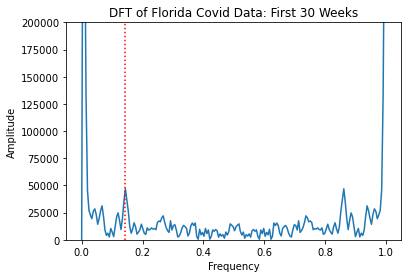

In [30]:
#plotting the 30 week fourier transform for Florida
state_curve = get_state_arr("Florida", days)
state_curvechop = state_curve[0:210]
x_ax = np.linspace(0,1, len(state_curvechop))
statemean = np.mean(state_curvechop)
statemr = state_curvechop - statemean
statefft = np.fft.fft(statemr)
plt.plot(x_ax, abs(statefft))
plt.axvline(x=(1/7), color='red', linestyle = 'dotted')
#plt.xlim(20,50)
plt.ylim(0,200000)
plt.xlabel("Frequency")
plt.ylabel("Amplitude")
plt.title("DFT of Florida Covid Data: First 30 Weeks")


[]

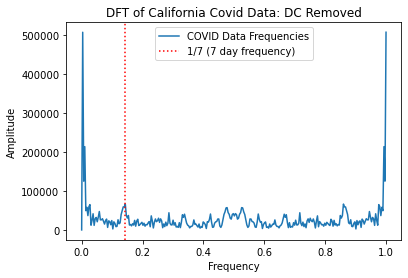

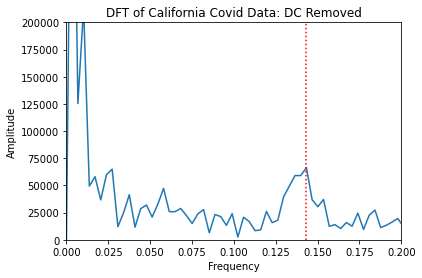

In [22]:
#Taking the fourier transform of the mean-removed data for California
plt.figure()
get_state_fft('California', days)
plt.title("DFT of California Covid Data: DC Removed")
plt.axvline(x=(1/7), color='red', linestyle = 'dotted')
plt.legend(['COVID Data Frequencies', '1/7 (7 day frequency)'])

plt.figure()
get_state_fft('California', days)
plt.axvline(x=(1/7), color='red', linestyle = 'dotted')
plt.xlim(0,0.2)
plt.ylim(0,200000)
plt.plot()



Text(0.5, 1.0, 'DFT of California Covid Data: First 30 Weeks')

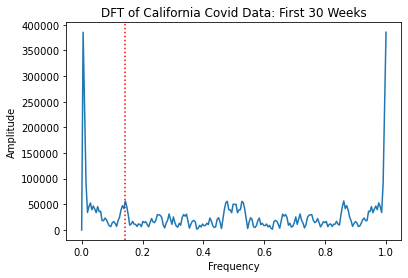

In [32]:
#Test hypothesis that the spike at 42 is referring to the number of weeks of data:
#Chop data down to the first 30 weeks, take fourier transform, and see if spike moves from 42 to 30
state_curve = get_state_arr("California", days)
state_curvechop = state_curve[0:210]
x_ax = np.linspace(0,1, len(state_curvechop))
statemean = np.mean(state_curvechop)
statemr = state_curvechop - statemean
statefft = np.fft.fft(statemr)
plt.plot(x_ax, abs(statefft))
plt.axvline(x=(1/7), color='red', linestyle = 'dotted')
#plt.xlim(20,50)
#plt.ylim(0,150000)
plt.xlabel("Frequency")
plt.ylabel("Amplitude")
plt.title("DFT of California Covid Data: First 30 Weeks")


[]

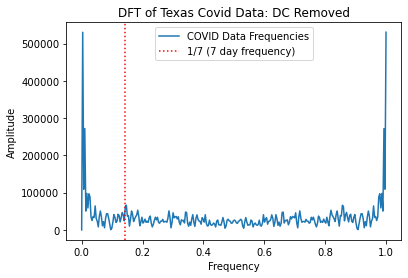

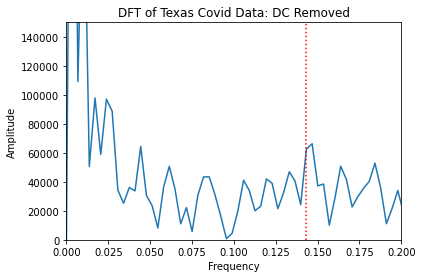

In [23]:
#Taking the fourier transform of the mean-removed data for Texas
plt.figure()
get_state_fft('Texas', days)
plt.axvline(x=(1/7), color='red', linestyle = 'dotted')
plt.legend(['COVID Data Frequencies', '1/7 (7 day frequency)'])
#plt.xlim(0,10)
#plt.ylim(0,400000)

plt.figure()
get_state_fft('Texas', days)
plt.axvline(x=(1/7), color='red', linestyle = 'dotted')
plt.xlim(0,0.2)
plt.ylim(0,150000)
plt.plot()


## Create an array of all 50 states; Run Fourier on full data

In [7]:
#List of US States
states = np.array(["Alaska", "Alabama", "Arkansas", "Arizona", "California", "Colorado", "Connecticut", "Delaware", 
                   "Florida", "Georgia", "Hawaii", "Iowa", "Idaho", "Illinois", "Indiana", "Kansas", "Kentucky", 
                   "Louisiana", "Massachusetts", "Maryland", "Maine", "Michigan", "Minnesota", "Missouri", 
                   "Mississippi", "Montana", "North Carolina", "North Dakota", "Nebraska", "New Hampshire", 
                   "New Jersey", "New Mexico", "Nevada", "New York", "Ohio", "Oklahoma", "Oregon", "Pennsylvania", 
                   "Puerto Rico", "Rhode Island", "South Carolina", "South Dakota", "Tennessee", "Texas", "Utah", 
                   "Virginia", "Vermont", "Washington", "Wisconsin", "West Virginia", "Wyoming"])
#Get state arrays
US = []
for i in range(51):
    US.append(get_state_arr(states[i],days))
print(len(US))

#Take state arrays and put them into a flat array
USlong = []
for c in range(51):
    statea = US[c]
    for i in range(294):
        USlong.append(statea[i])
#USflat = [val for sublist in USlong for val in sublist]
    
print(len(USlong))

51
14994


Text(0.5, 1.0, 'DFT of US COVID Data: DC Removed')

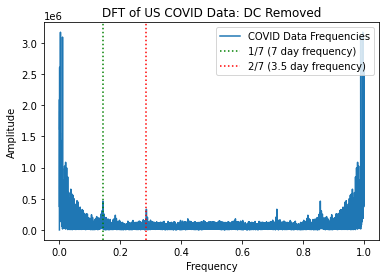

In [25]:
#Now, run the fourier code but instead of using a single state, use the USlong array

x_ax = np.linspace(0,1, len(USlong))
statemean = np.mean(USlong)
statemr = USlong - statemean
statefft = np.fft.fft(statemr)
plt.plot(x_ax, abs(statefft))
plt.axvline(x=(1/7), color='green', linestyle = 'dotted')
plt.axvline(x=(2/7), color='red', linestyle = 'dotted')
#plt.xlim(0.2,0.4)
plt.xlabel("Frequency")
plt.ylabel("Amplitude")
plt.legend(['COVID Data Frequencies', '1/7 (7 day frequency)', '2/7 (3.5 day frequency)'], loc = 'upper right')
plt.title("DFT of US COVID Data: DC Removed")